This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will analyze clustering methods over the Pima Indiand Diabetes dataset.

# Table of Contents

0. [Preliminaries](#preliminaries)
1. [K-means](#k_means) 
2. [Hierchical clustering](#hierarchical)
3. [Assignment questions](#questions)

---
<a id='preliminaries'></a>
# 0 . Preliminaries

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.ddbb import load_pima_indian
from sklearn.preprocessing import StandardScaler
from src.utils import plot_scatter, plot_silhouette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns

## Load dataset

In this lab exercise you are using the Pima Indian Diabetes data. Your hypothesis is that **there might be groups of patients with similar behavior** and you want to get some insights about them.

- - -
# 6.1

In [2]:
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

In [3]:
X.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: outcome, dtype: int64

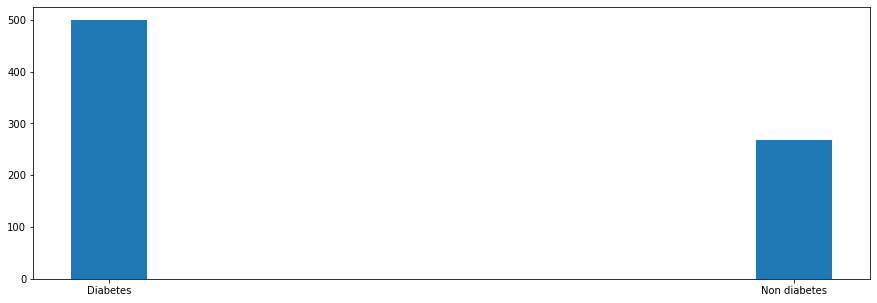

In [5]:
plt.figure(figsize = (15,5))
hist_y = plt.hist(y)
plt.xticks([0.05, 0.95],  ['Diabetes' , 'Non diabetes'] , rotation = 0)
plt.show()

---

# 1 : [ 'bmi' , 'glucose' ]


# K-means

In [6]:
X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

In [7]:
print(X1.shape)

(768, 2)


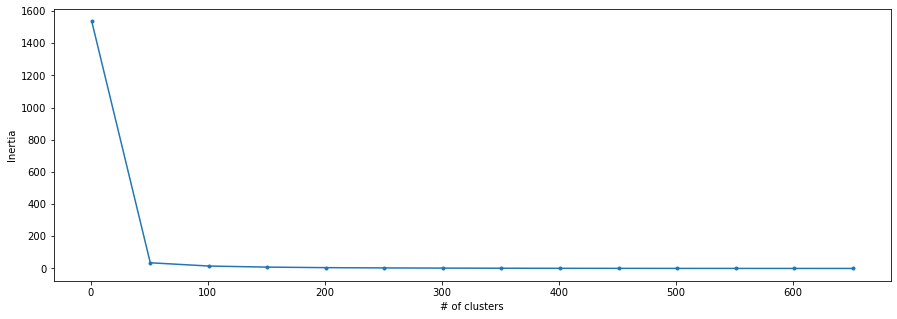

In [10]:
plt.figure(figsize = (15,5))
K = range(1,700,50)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

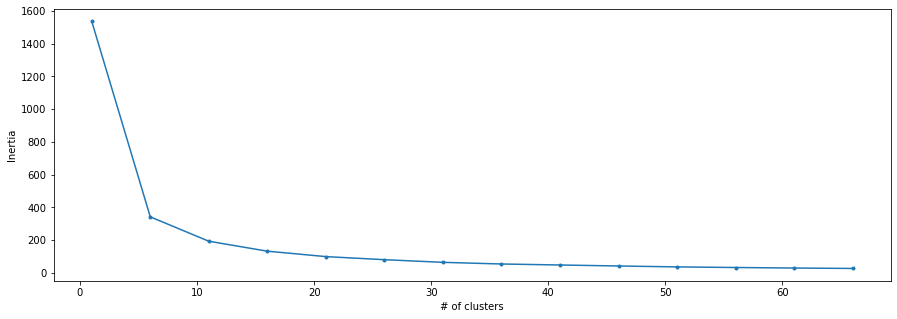

In [11]:
plt.figure(figsize = (15,5))
K = range(1,70,5)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
k = range(5,20,5)
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
kmeans = KMeans(n_clusters=100, random_state=10)
cluster_labels = kmeans.fit_predict(X1)

silhouette_avg = silhouette_score(X1, cluster_labels)
print("For n_clusters =", 100,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.3422693141177146
For n_clusters = 10 The average silhouette_score is : 0.3464115882719585
For n_clusters = 15 The average silhouette_score is : 0.34339536159762307
For n_clusters = 100 The average silhouette_score is : 0.34838770977850525


## k = 10

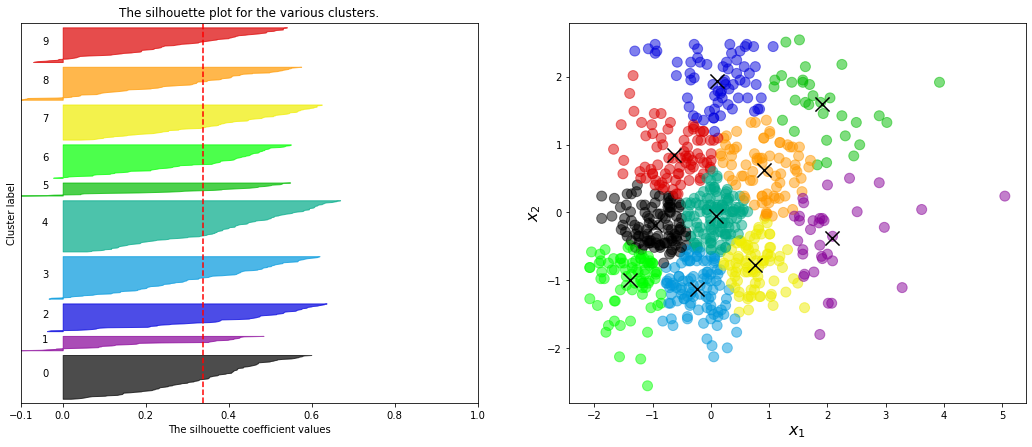

In [9]:
k = 10
kmeans = KMeans(n_clusters=k).fit(X1)
silhoutte = plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)

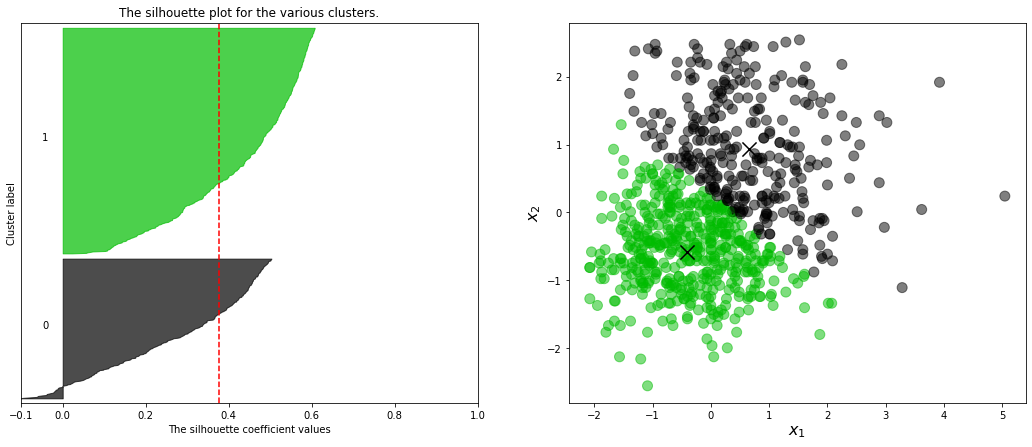

In [10]:
k = 2
kmeans = KMeans(n_clusters=k).fit(X1)
silhoutte = plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)

### Comparison

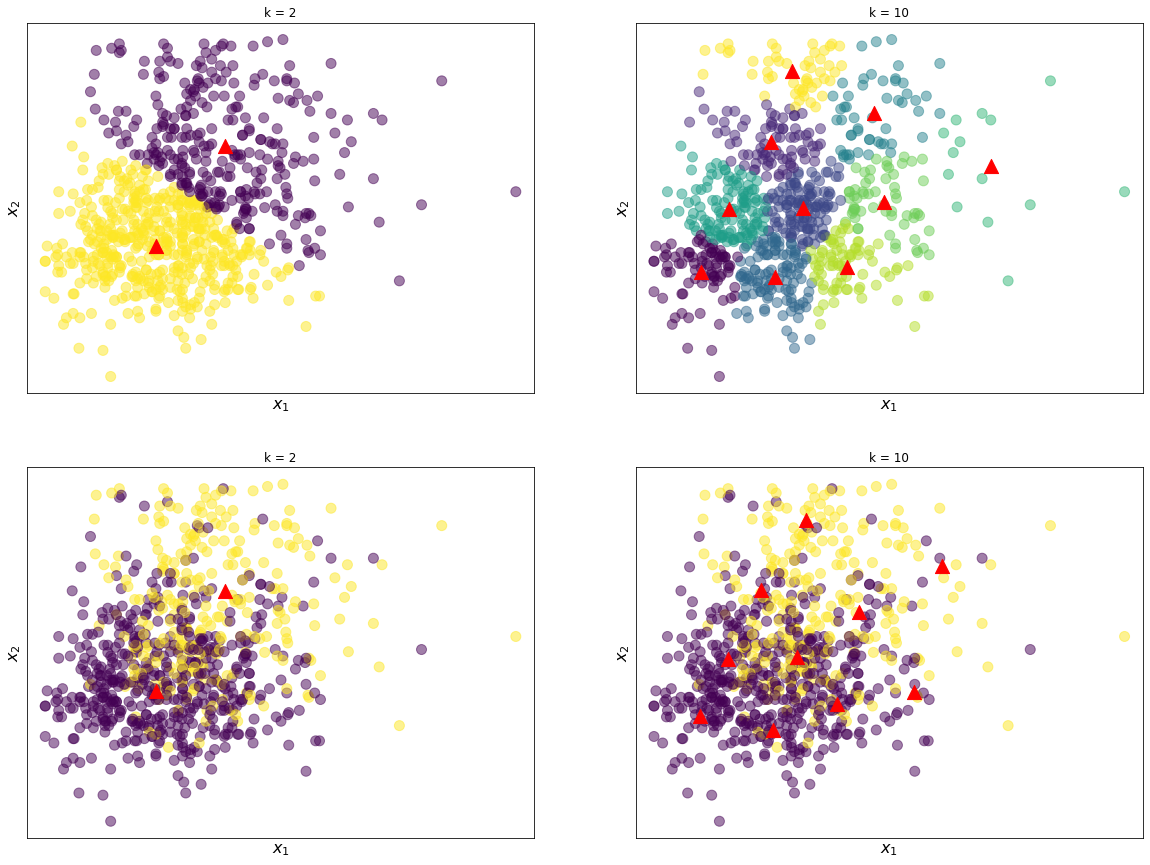

In [11]:
plt.figure(figsize = (20,15))
k_s = [2, 10]
i = 1
for k in k_s :
    plt.subplot(2,2,i)
    kmeans = KMeans(n_clusters = k).fit(X1)
    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
    i += 1

for k in k_s :
    plt.subplot(2,2,i)
    kmeans = KMeans(n_clusters = k).fit(X1)
    centroids = kmeans.cluster_centers_
    plot_scatter(X1,'k = ' + str(k), y, centroids)
    i += 1
    
    
plt.show()

## Answer
<br>
The number of clusters selected in this point has been 10. The reason why we choose this number is due to the fact that elbow point, from the Inertia plot, seems to be in the interval of 10 to 75 clusters. So in order to be more explicit with the answer, we also perform the average silhouette of values from this interval.


Finally, we assume that the best value from the two metrics is 10.

---

# 2 : [ All ]


# K-means

In [12]:
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X1 = X.values
X1 = StandardScaler().fit_transform(X1)

print(X1.shape)

(768, 8)


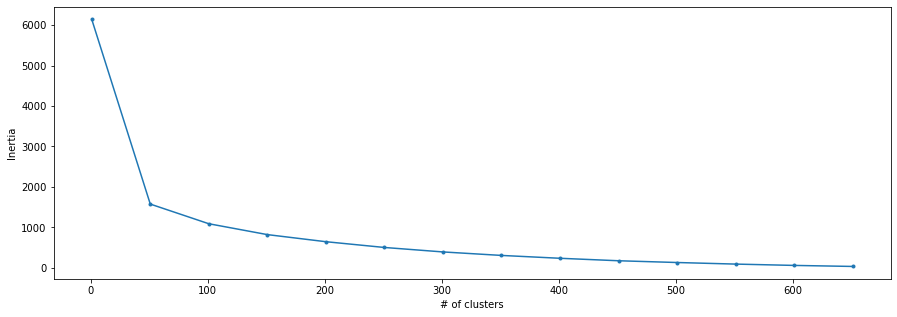

In [18]:
plt.figure(figsize = (15,5))
K = range(1,700,50)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

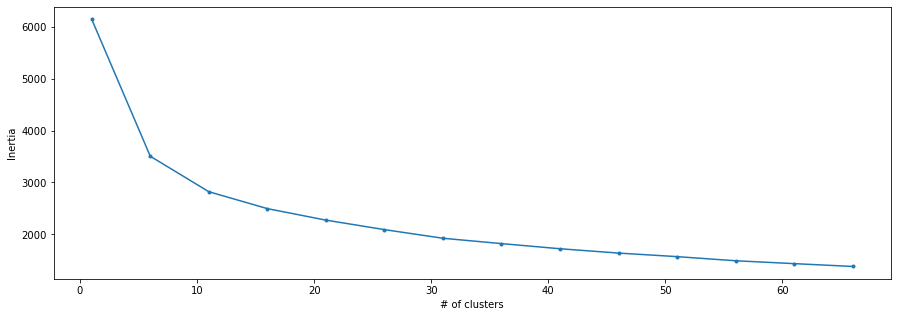

In [19]:
plt.figure(figsize = (15,5))
K = range(1,70,5)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
k = range(5, 20, 5)
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.17929258229150447
For n_clusters = 10 The average silhouette_score is : 0.14313193548130443
For n_clusters = 15 The average silhouette_score is : 0.12229619280489552


## k = 10

In [14]:
k_s = 10

kmeans = KMeans(n_clusters = k_s).fit(X1)
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [15]:
df = X.copy()
df['cluster_labels'] = cluster_labels
columns_of_interest = df.columns[0:-1]
print('Columns of interest : ', columns_of_interest)

Columns of interest :  Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age'],
      dtype='object')


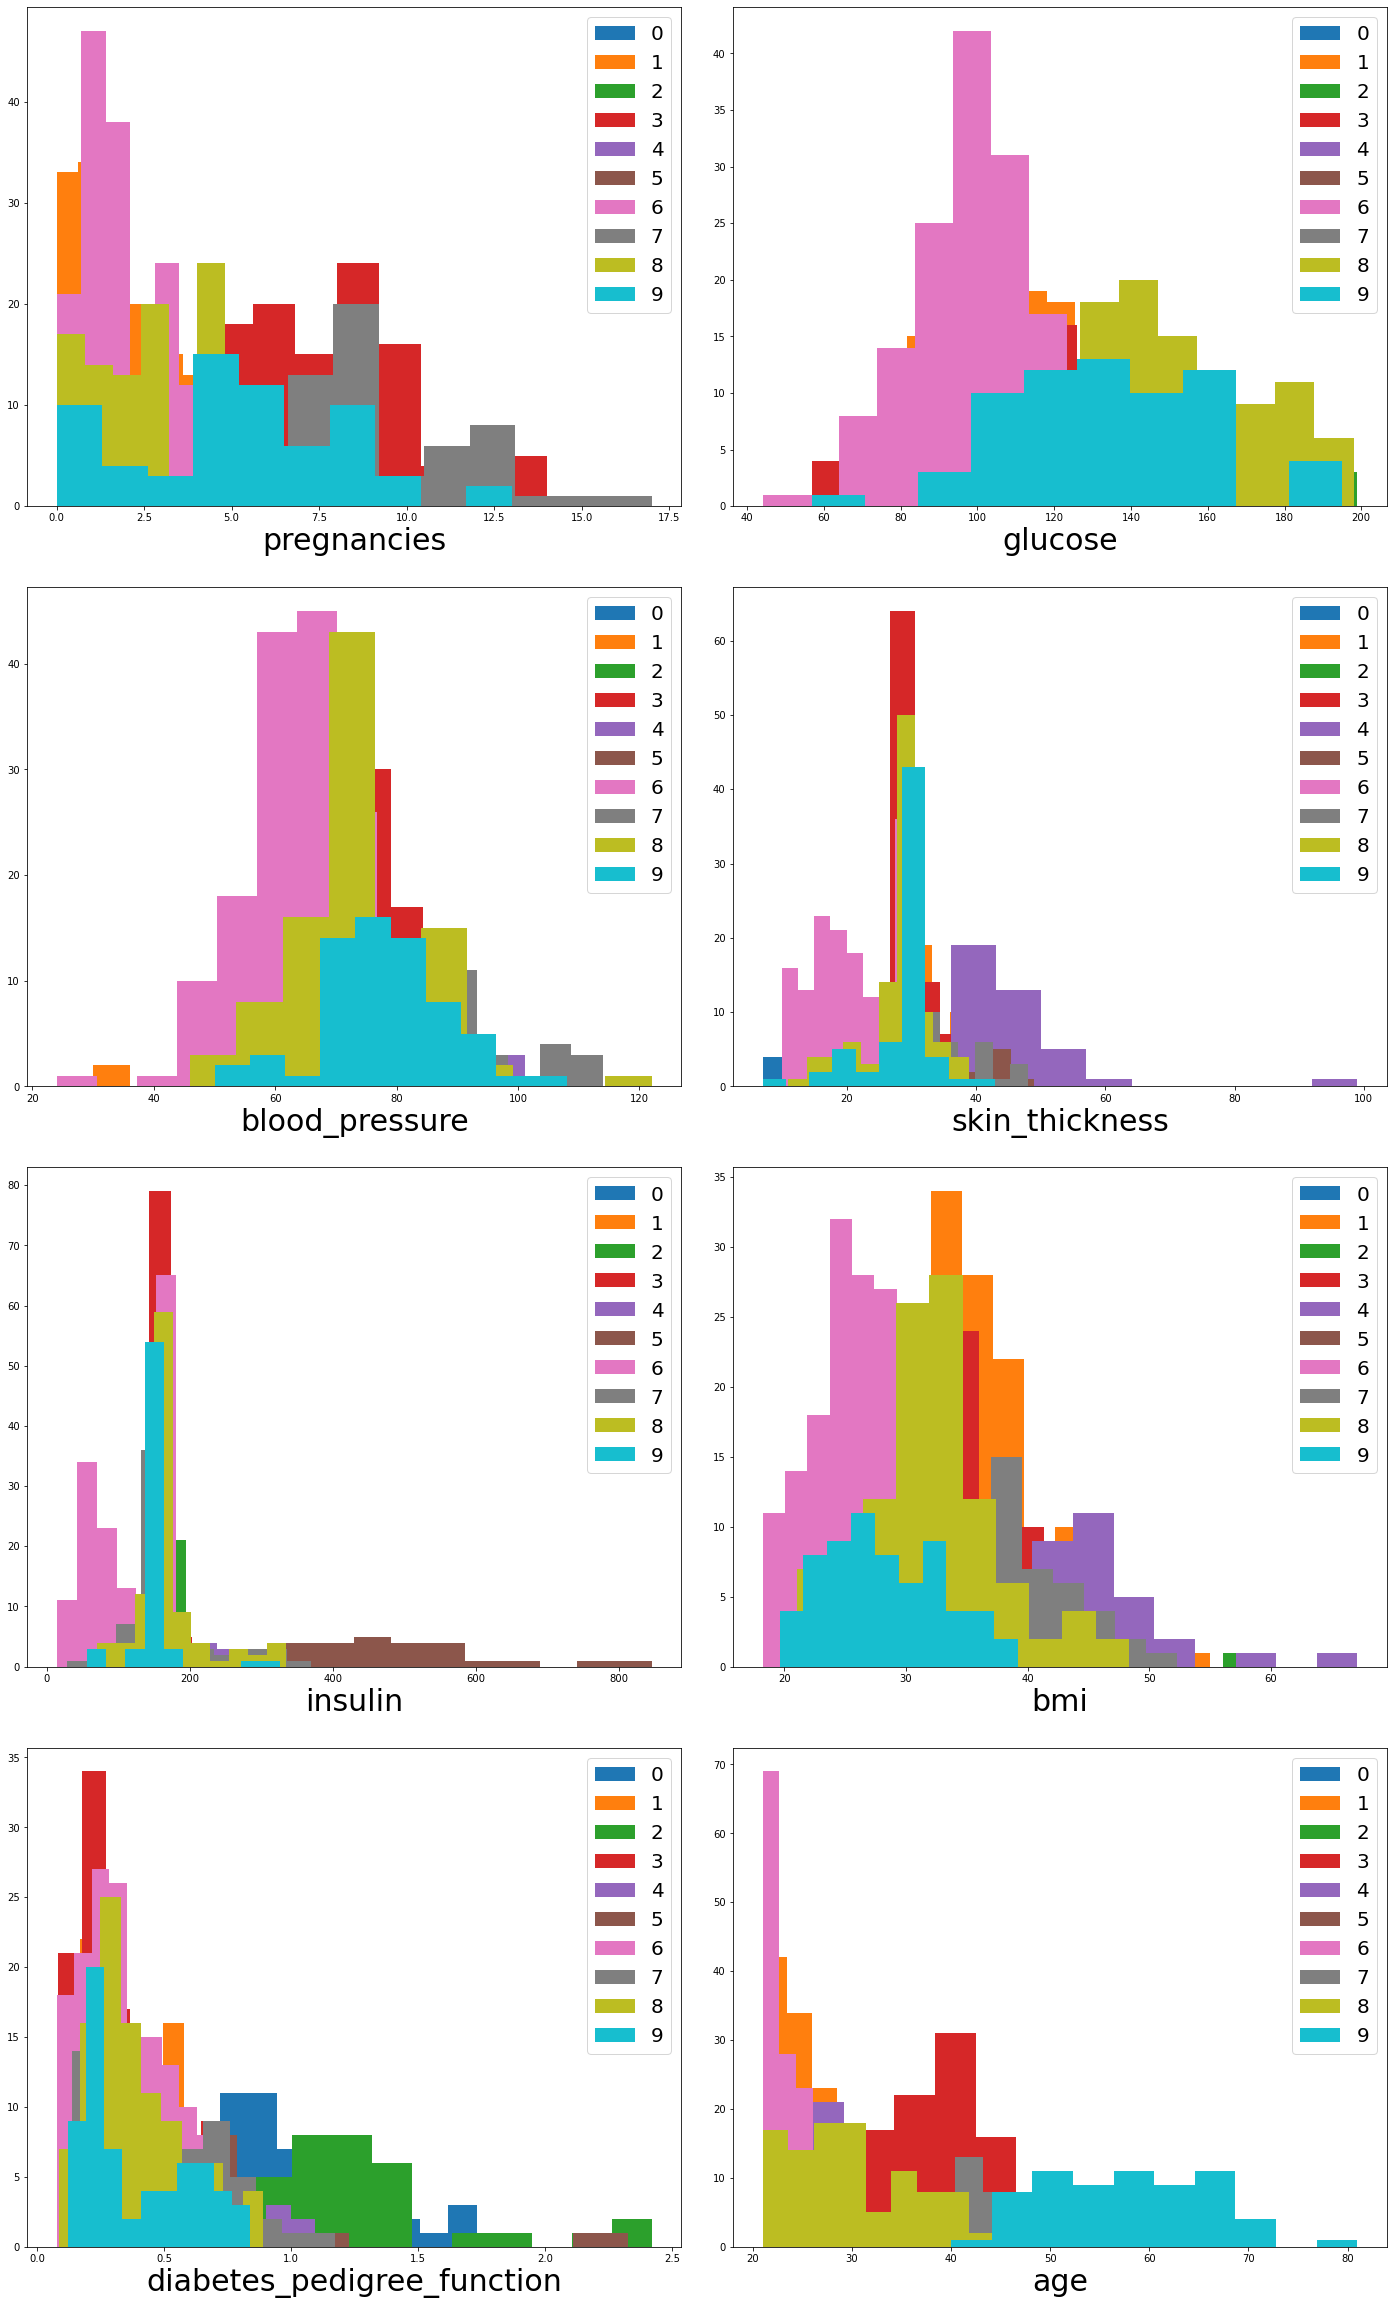

In [16]:
plt.figure(figsize=(20,40))
j = 1
for feature in columns_of_interest:
    plt.subplot(5,2,j)
    for i in range(0,10):
        plt.hist(df[df.cluster_labels == i][feature], Label = i)
    plt.xlabel(feature, fontsize = 30) 
    plt.legend(prop={'size': 20})
    j += 1
plt.tight_layout(pad=3.0)
plt.show()

In [17]:
for feature in columns_of_interest:
    print('Column of interest : ', feature)
    print('')
    for i in range(0,10,1):
        print( 'Cluster : ', i , ' with mean = '  ,df[df.cluster_labels == i][feature].mean())
    print('')

Column of interest :  pregnancies

Cluster :  0  with mean =  2.7222222222222223
Cluster :  1  with mean =  1.6967213114754098
Cluster :  2  with mean =  3.65625
Cluster :  3  with mean =  7.7
Cluster :  4  with mean =  1.7555555555555555
Cluster :  5  with mean =  3.52
Cluster :  6  with mean =  2.0387096774193547
Cluster :  7  with mean =  9.120689655172415
Cluster :  8  with mean =  2.7450980392156863
Cluster :  9  with mean =  5.276923076923077

Column of interest :  glucose

Cluster :  0  with mean =  109.01851851851852
Cluster :  1  with mean =  102.89907182605333
Cluster :  2  with mean =  152.90625
Cluster :  3  with mean =  104.51248659597283
Cluster :  4  with mean =  127.97777777777777
Cluster :  5  with mean =  163.6
Cluster :  6  with mean =  100.74434532617427
Cluster :  7  with mean =  155.41379310344828
Cluster :  8  with mean =  150.91176470588235
Cluster :  9  with mean =  134.6769230769231

Column of interest :  blood_pressure

Cluster :  0  with mean =  66.326309938

## Answer a)
<br>
The number of clusters selected in the second point has been 10 too. The reason is more likely similar to the previous shown in first section. The fact that the Inertia plot shows the same interval used before as the best region for choosing the elbow point, it make us to follow the same procedure as the previous point. So, in order to distinguish which value fits best, we perform again the average silhouette.

Finally, the best value from the two metrics is 10.

## Answer b)
<br>
Because of the use of all the features from the X set, we conclude that the most suitable method to provide an interpretation of the cluster results is the sum of histograms per column. 

Thanks to this, It can be seen which are the features, from each cluster, with the most standing characteristics. For example, the amount of people around the 50 ~ 60 years old that belong to cluster nine.

As an extra tool, we perform the mean of each column, so that the explanation from the histograms could be easier to interpret.

# Salient behaviour of each:

* 0: Low values in skin thickness and bmi
* 1: High distribution on bmi
* 2: The expanded distribution in diabetes pedigree function
* 3: The peaks in skin thickness and insulin
* 4: The high mean on bmi and blood pressure
* 5: The high mean on insulin
* 6: The lowest mean in age and some other distributions like blood pressure and glucose
* 7: The high mean in blood pressure
* 8: The peak in skin thickness and insulin, also high distributions like in blood pressure
* 9:  Age mean and distribution

---

# 3: PCA

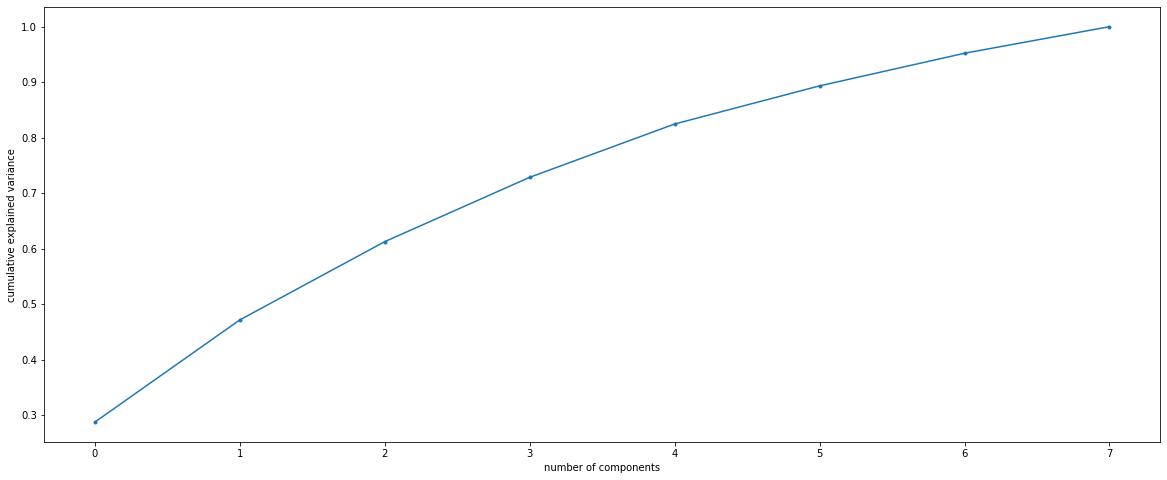

In [2]:
# scaling
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

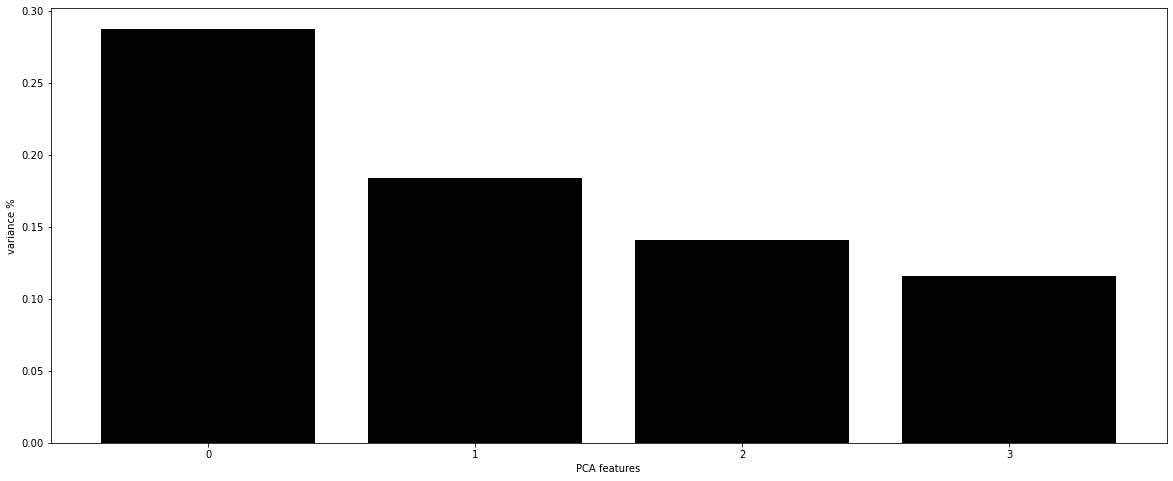

In [3]:
# scaling
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(20,8))

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

## Answer a)
<br>
The number of components that we have chosen is 4. The reason behind this is related to the plot of the explained variance ratio. We decide to select a number where we could stil keep a high number of variability from our data (Exactly, an 80%). 

Finally, we perform the same plot but focusing on these four components just to see what amount of variance explains each one with respect to the 80% of the total. We can see a drop off from the first to the second. So we choose to use at the end the first two components so that we can have the ability to present the results from cluster in a scatter plot, and still explain most of the variability.

#### Reference:
* https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

In [4]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components.head()

,0,1,2,3
0,1.503630,-0.588089,0.196277,0.570344
1,-1.437513,0.076988,-0.101160,-0.192896
2,0.492233,-0.812569,1.653374,0.460438
3,-2.212028,0.118082,-0.462422,-0.596226
4,0.553302,3.469320,1.972599,4.775633


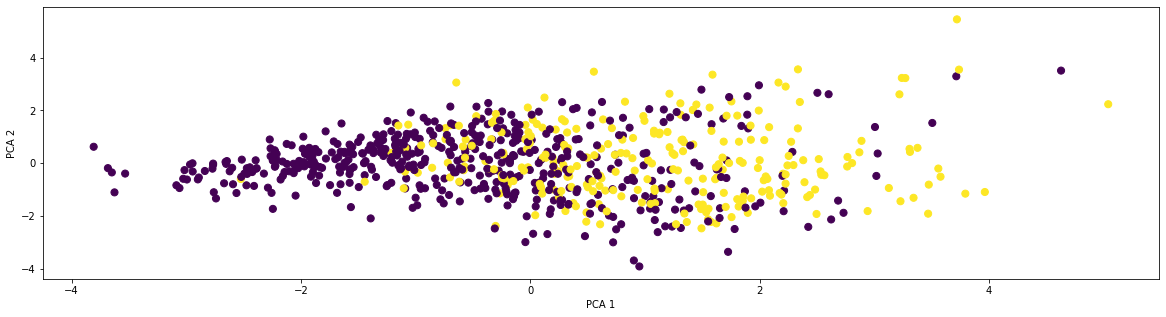

In [16]:
plt.figure(figsize=(20,5))
labels_for_scatter = y.values
label_scatter = ['Diabetes', 'Non diabetes']

plt.scatter(PCA_components[0], PCA_components[1], s = 50 ,  c = labels_for_scatter)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [22]:
print(PCA_components.iloc[:,:2].shape)  # First two components
print(PCA_components.shape)

(768, 2)
(768, 4)


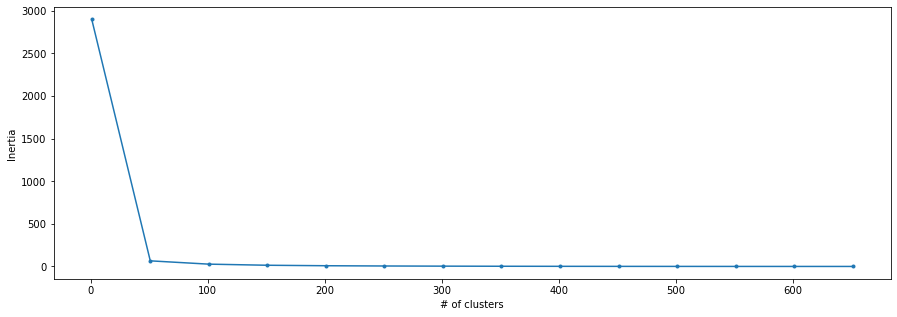

In [35]:
plt.figure(figsize = (15,5))
K = range(1,700,50)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(PCA_components.iloc[:,:2]) # First two PCA features
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

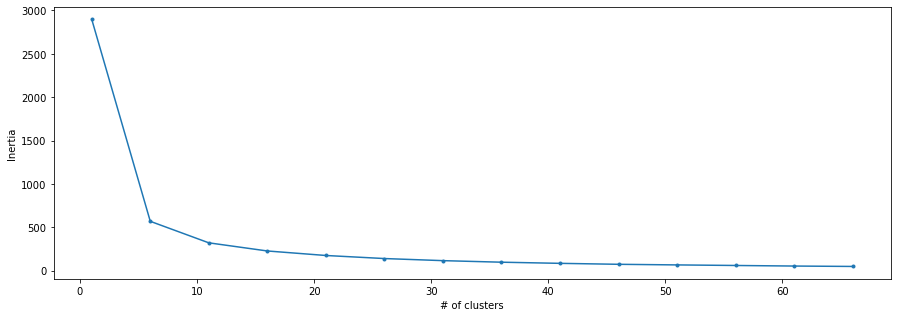

In [36]:
plt.figure(figsize = (15,5))
K = range(1,70,5)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(PCA_components.iloc[:,:2]) # First two PCA features
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
k = range(5, 20, 5)
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(PCA_components.iloc[:,:2])

    silhouette_avg = silhouette_score(PCA_components.iloc[:,:2], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.3706394499551336
For n_clusters = 10 The average silhouette_score is : 0.34547991513105175
For n_clusters = 15 The average silhouette_score is : 0.3372945034596359


## k = 10

In [24]:
k_s = 10

kmeans = KMeans(n_clusters = k_s).fit(PCA_components.iloc[:,:2])
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [25]:
PCA_components.iloc[:,:2].head()  # Example of the dataframe from first 2 

,0,1
0,1.503630,-0.588089
1,-1.437513,0.076988
2,0.492233,-0.812569
3,-2.212028,0.118082
4,0.553302,3.469320


In [26]:
df = PCA_components.iloc[:,:2].copy()
df['cluster_labels'] = cluster_labels
df.head(5)

,0,1,cluster_labels
0,1.503630,-0.588089,2
1,-1.437513,0.076988,7
2,0.492233,-0.812569,4
3,-2.212028,0.118082,5
4,0.553302,3.469320,3


In [27]:
for i in range(0,10,1):
    print('Cluster of interest : ', i)
    print('')
    print('Mean in first component = ',df[df.cluster_labels == i][0].mean())
    print('Mean in second component = ',df[df.cluster_labels == i][1].mean())
    print('')

Cluster of interest :  0

Mean in first component =  -0.44075916776284346
Mean in second component =  -0.8365140772905645

Cluster of interest :  1

Mean in first component =  -0.3491494556267769
Mean in second component =  1.3000685203261269

Cluster of interest :  2

Mean in first component =  2.060225204567502
Mean in second component =  0.06248092539692801

Cluster of interest :  3

Mean in first component =  1.2314574884718448
Mean in second component =  1.7221308537638556

Cluster of interest :  4

Mean in first component =  0.365294882416935
Mean in second component =  0.004256371902415261

Cluster of interest :  5

Mean in first component =  -2.385118033415118
Mean in second component =  -0.3263395580483487

Cluster of interest :  6

Mean in first component =  0.8656537942139281
Mean in second component =  -1.8294277092637818

Cluster of interest :  7

Mean in first component =  -1.3195231535015843
Mean in second component =  0.39768756109770026

Cluster of interest :  8

Mean 

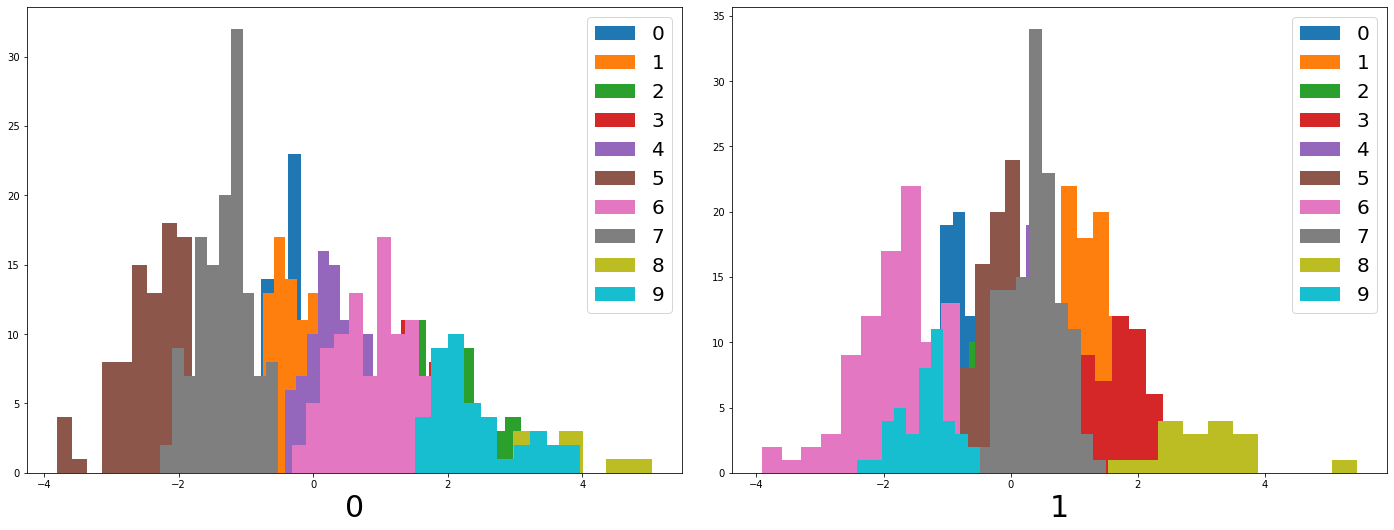

In [29]:
plt.figure(figsize=(20,8))
j = 1
for column in df.columns[0:-1]:
    plt.subplot(1,2,j)
    for i in range(0,10):
        plt.hist(df[df.cluster_labels == i][column], Label = i)
    plt.xlabel(column, fontsize = 30) 
    plt.legend(prop={'size': 20})
    j += 1
plt.tight_layout(pad=3.0)
plt.show()

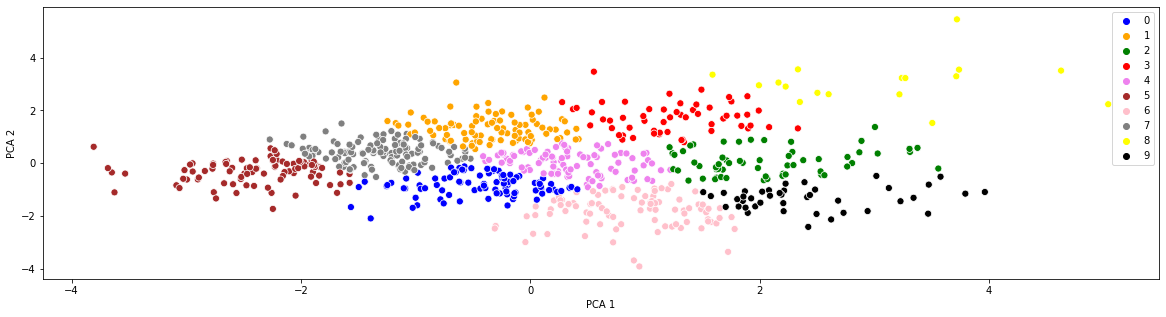

In [32]:
plt.figure(figsize=(20,5))
colors = cm.rainbow(np.linspace(0, 1, df['cluster_labels'].nunique()))

sns.scatterplot(PCA_components[0], PCA_components[1],
                palette = ['b','orange', 'green', 'red', 'violet', 'brown','pink',
                           'grey', 'yellow', 'black'] , s = 50 ,hue = df['cluster_labels'].values)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

## Answer b) and c)
<br>
The procedure to find out the optimal value of clusters is the same as the two previous ones explained already. 

Here, we plot the histogram from both components of PCA, and at the end, the scatter plot for a better interpretation.

# Salient behaviour of each:

* 0: Both negative means proximal to zero 
* 1: Big mean in the second component and zero mean proximal to the left (negative value)
* 2: Differenc between the high mean in first component and the zero mean in second
* 3: Distributions around 1.5 value on both
* 4: Very central means in both components 
* 5: Low distribution on firs component. Both negatives
* 6: Low distribution on the second component, central in the first 
* 7: Low distribution on firs component and central in the second
* 8: High means in both components
* 9: Low distribution on the second component, high in the first 

---

# 6.4


# Hierarchical clustering

## Answer 
<br>
Here, in order to get the best value possible for the number of clusters, we will use the representation of a dendogram, using as linkage criteria the ward.

After performing it, we count the amount nested cluster that have the requiste of similarity equals 10.

Finally, the interpretation of the results are the same as the k-means section.

---

# 1 : [ 'bmi' , 'glucose' ]

In [61]:
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

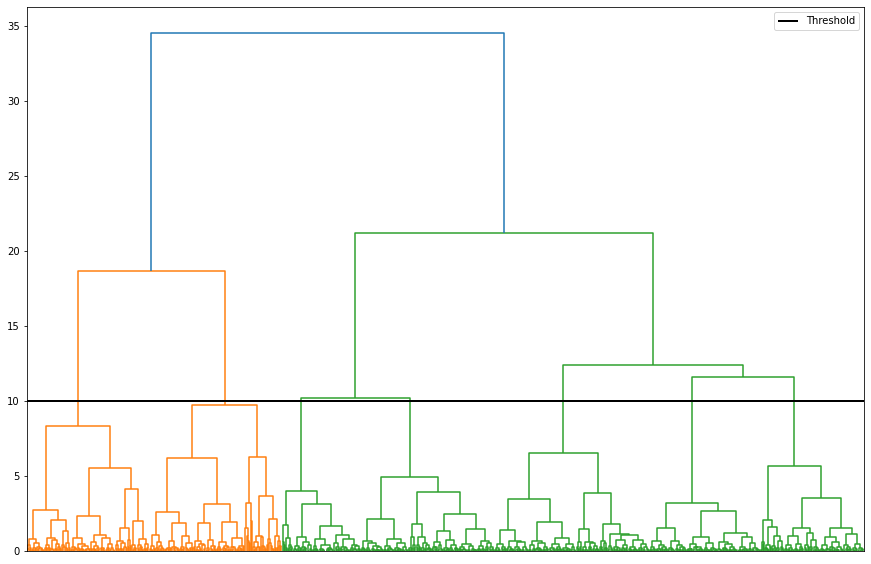

In [87]:
plt.figure(figsize = (15,10))
Z = linkage(X1, 'ward')
dendrogram(Z)
plt.hlines(y=10, xmin=1, xmax = 10*len(X1), colors='black', 
           linestyles='-', lw=2, label='Threshold')
plt.tick_params(axis='x', which='both', bottom=False, top=False,  labelbottom=False)
plt.legend(prop={'size': 10})
plt.show()

## k = 7

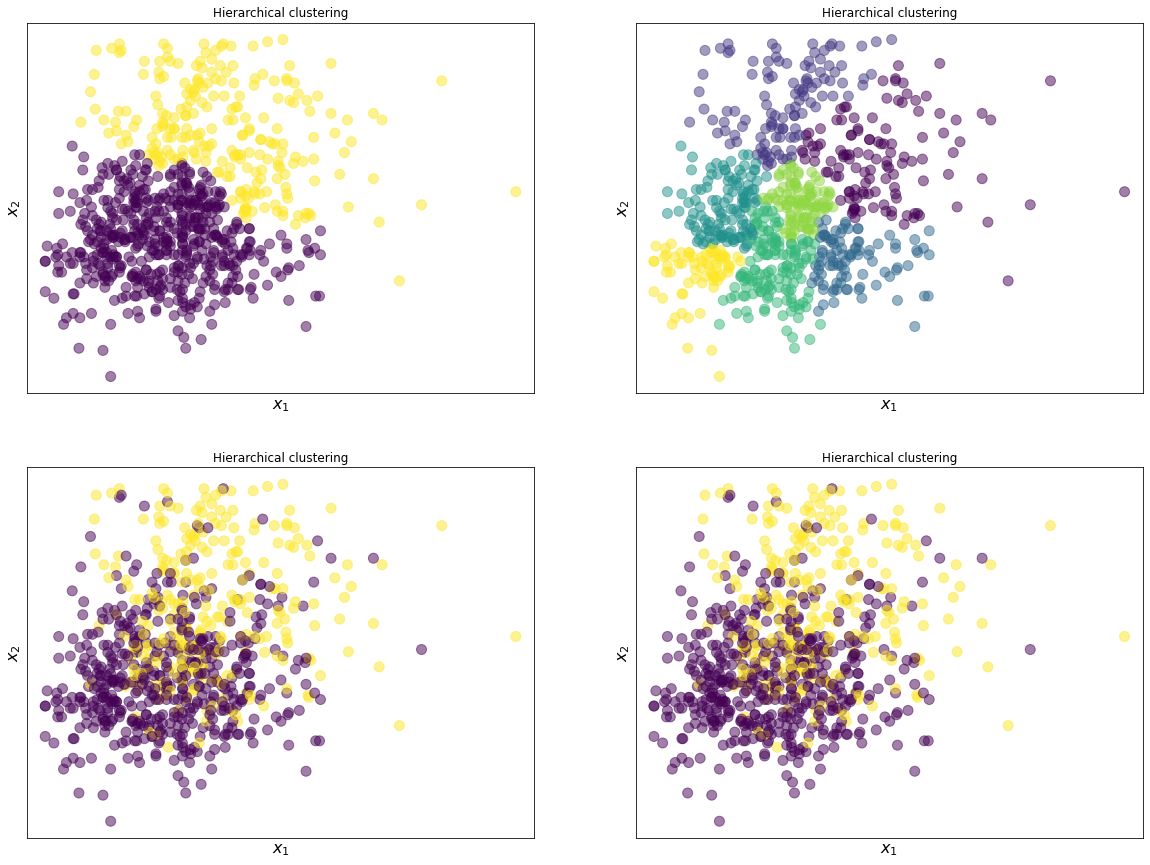

In [88]:
plt.figure(figsize = (20,15))
k_s = [2, 7]
i = 1
for k in k_s :
    plt.subplot(2,2,i)
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward' ).fit(X1)
    plot_scatter(X1,'Hierarchical clustering', agg.labels_) 
    i += 1

for k in k_s :
    plt.subplot(2,2,i)
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X1)
    plot_scatter(X1,'Hierarchical clustering', y) 
    i += 1

# 2 : [ All ]

In [33]:
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X1 = X.values
X1 = StandardScaler().fit_transform(X1)

print(X1.shape)

(768, 8)


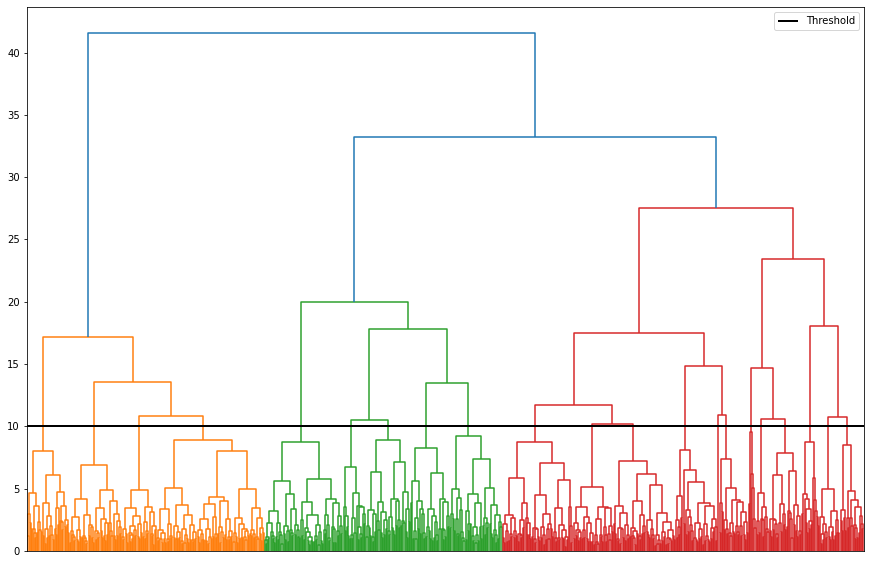

In [90]:
plt.figure(figsize = (15,10))
Z = linkage(X1, 'ward')
dendrogram(Z)
plt.hlines(y=10, xmin=1, xmax = 10*len(X1), colors='black', 
           linestyles='-', lw=2, label='Threshold')
plt.tick_params(axis='x', which='both', bottom=False, top=False,  labelbottom=False)
plt.legend(prop={'size': 10})
plt.show()

## k = 20

In [34]:
agg = AgglomerativeClustering(n_clusters=20, linkage='ward' ).fit(X1)
cluster_labels = agg.labels_

In [35]:
df = X.copy()
df['cluster_labels'] = cluster_labels
columns_of_interest = df.columns[0:-1]
print('Columns of interest : ', columns_of_interest)

Columns of interest :  Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age'],
      dtype='object')


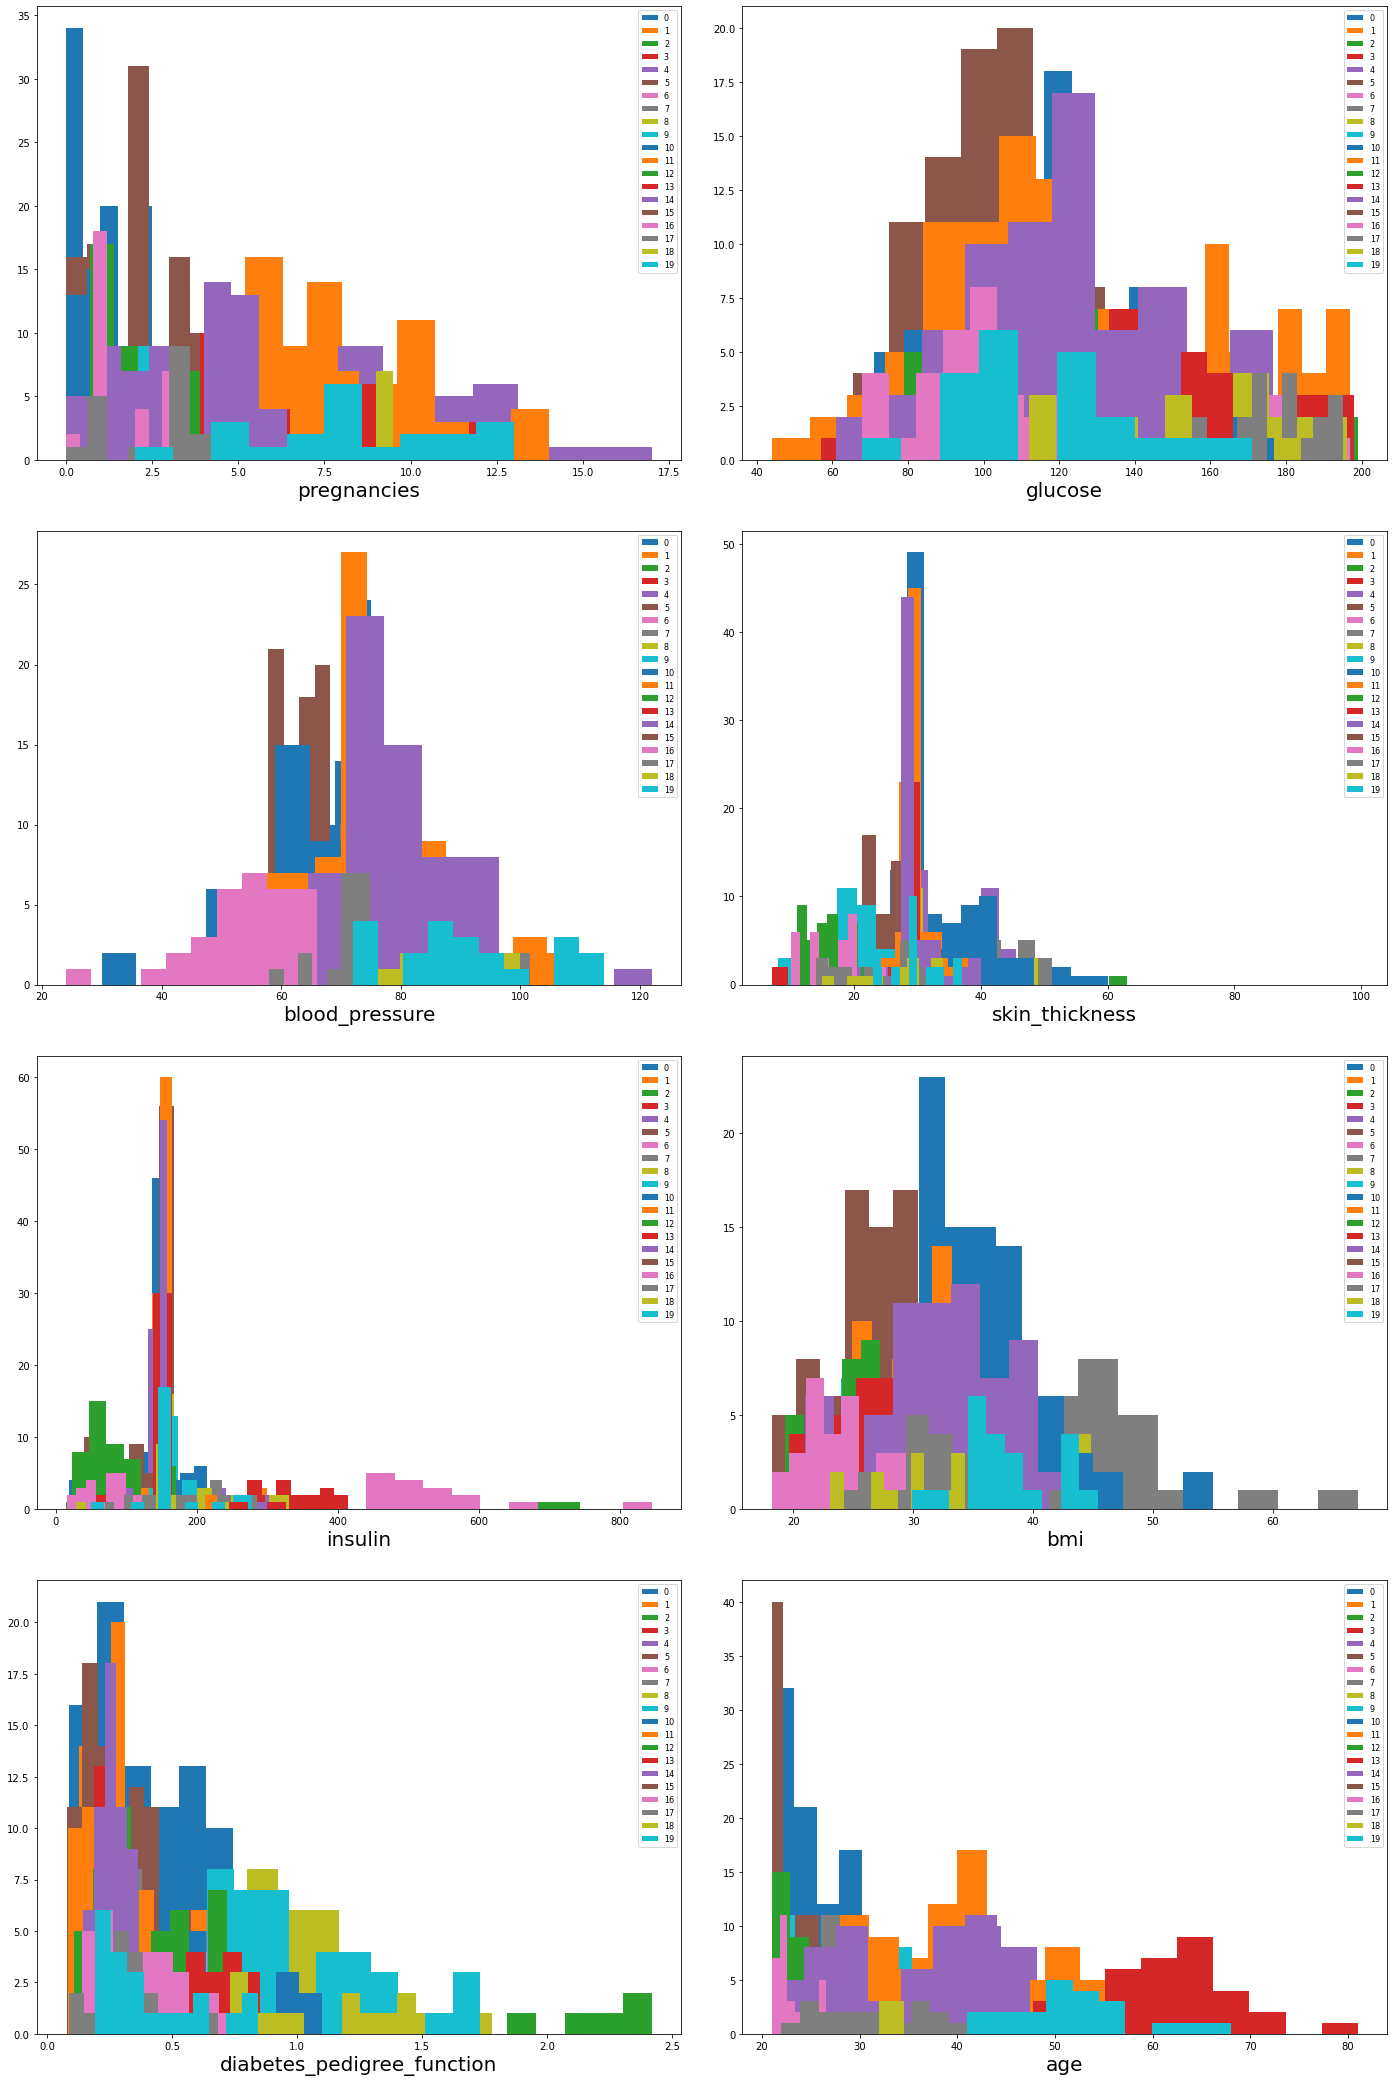

In [36]:
plt.figure(figsize=(20,80))
j = 1
for feature in columns_of_interest:
    plt.subplot(11,2,j)
    for i in range(0,20):
        plt.hist(df[df.cluster_labels == i][feature], Label = i)
    plt.xlabel(feature, fontsize = 20) 
    plt.legend(prop={'size': 8})
    j += 1
plt.tight_layout(pad=3.0)
plt.show()

In [37]:
for feature in columns_of_interest:
    print('Column of interest : ', feature)
    print('')
    for i in range(0,20,1):
        print( 'Cluster : ', i , ' with mean = '  ,df[df.cluster_labels == i][feature].mean())
    print('')

Column of interest :  pregnancies

Cluster :  0  with mean =  1.446808510638298
Cluster :  1  with mean =  6.395833333333333
Cluster :  2  with mean =  1.2857142857142858
Cluster :  3  with mean =  3.8181818181818183
Cluster :  4  with mean =  9.365853658536585
Cluster :  5  with mean =  2.191919191919192
Cluster :  6  with mean =  3.0625
Cluster :  7  with mean =  1.2222222222222223
Cluster :  8  with mean =  2.966666666666667
Cluster :  9  with mean =  3.2051282051282053
Cluster :  10  with mean =  1.2307692307692308
Cluster :  11  with mean =  7.777777777777778
Cluster :  12  with mean =  2.25
Cluster :  13  with mean =  5.25
Cluster :  14  with mean =  3.4615384615384617
Cluster :  15  with mean =  2.0
Cluster :  16  with mean =  1.59375
Cluster :  17  with mean =  2.526315789473684
Cluster :  18  with mean =  9.583333333333334
Cluster :  19  with mean =  8.285714285714286

Column of interest :  glucose

Cluster :  0  with mean =  108.73404255319149
Cluster :  1  with mean =  167.8

# 3 : PCA

In [38]:
# scaling
X, y = load_pima_indian('./data/pima_indian_diabetes.csv')

X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

X_pca = PCA(n_components=4).fit_transform(X_scaled)
print(X_pca.shape)

(768, 4)


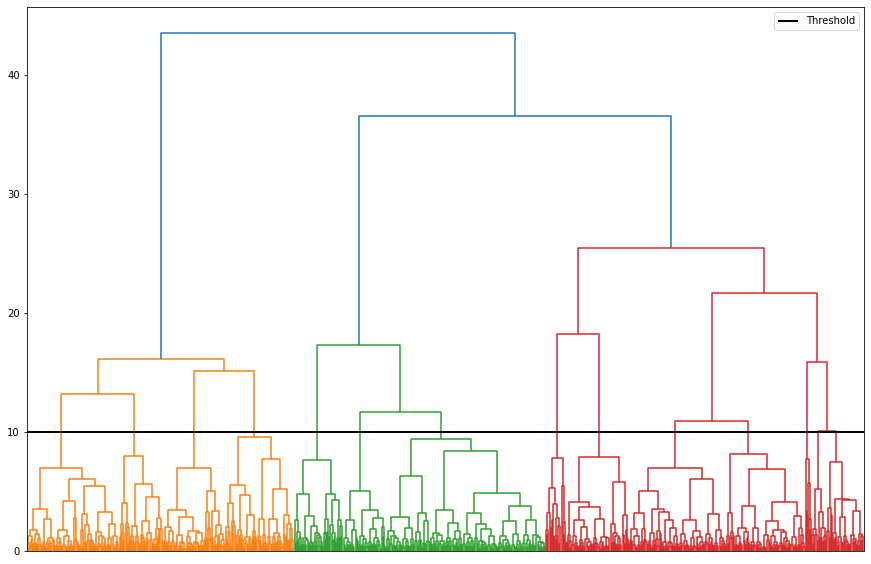

In [103]:
plt.figure(figsize = (15,10))
Z = linkage(X_pca, 'ward')
dendrogram(Z)
plt.hlines(y=10, xmin=1, xmax = 10*len(X1), colors='black', 
           linestyles='-', lw=2, label='Threshold')
plt.tick_params(axis='x', which='both', bottom=False, top=False,  labelbottom=False)
plt.legend(prop={'size': 10})
plt.show()

## k = 14

In [39]:
agg = AgglomerativeClustering(n_clusters=14, linkage='ward' ).fit(X1)
cluster_labels = agg.labels_

In [40]:
PCA_components.iloc[:,:2].head()  # Example of the dataframe from first 2 

,0,1
0,1.503630,-0.588089
1,-1.437513,0.076988
2,0.492233,-0.812569
3,-2.212028,0.118082
4,0.553302,3.469320


In [41]:
df = PCA_components.iloc[:,:2].copy()
df['cluster_labels'] = cluster_labels
df.head()

,0,1,cluster_labels
0,1.503630,-0.588089,4
1,-1.437513,0.076988,3
2,0.492233,-0.812569,4
3,-2.212028,0.118082,3
4,0.553302,3.469320,5


In [42]:
for i in range(0,20,1):
    print('Cluster of interest : ', i)
    print('')
    print('Mean in first component = ',df[df.cluster_labels == i][0].mean())
    print('Mean in second component = ',df[df.cluster_labels == i][1].mean())
    print('')

Cluster of interest :  0

Mean in first component =  -0.19335678758141914
Mean in second component =  0.390114278879464

Cluster of interest :  1

Mean in first component =  1.675413451735883
Mean in second component =  1.9007006262455228

Cluster of interest :  2

Mean in first component =  0.4753634702296078
Mean in second component =  0.35425635573205716

Cluster of interest :  3

Mean in first component =  -1.8487709040199816
Mean in second component =  0.053705855293669606

Cluster of interest :  4

Mean in first component =  1.582942590450226
Mean in second component =  -1.0129682412975722

Cluster of interest :  5

Mean in first component =  2.659444141222679
Mean in second component =  3.613974623694859

Cluster of interest :  6

Mean in first component =  2.552498078973444
Mean in second component =  1.3106899144845223

Cluster of interest :  7

Mean in first component =  1.8940172232265795
Mean in second component =  -0.7483737962360577

Cluster of interest :  8

Mean in firs

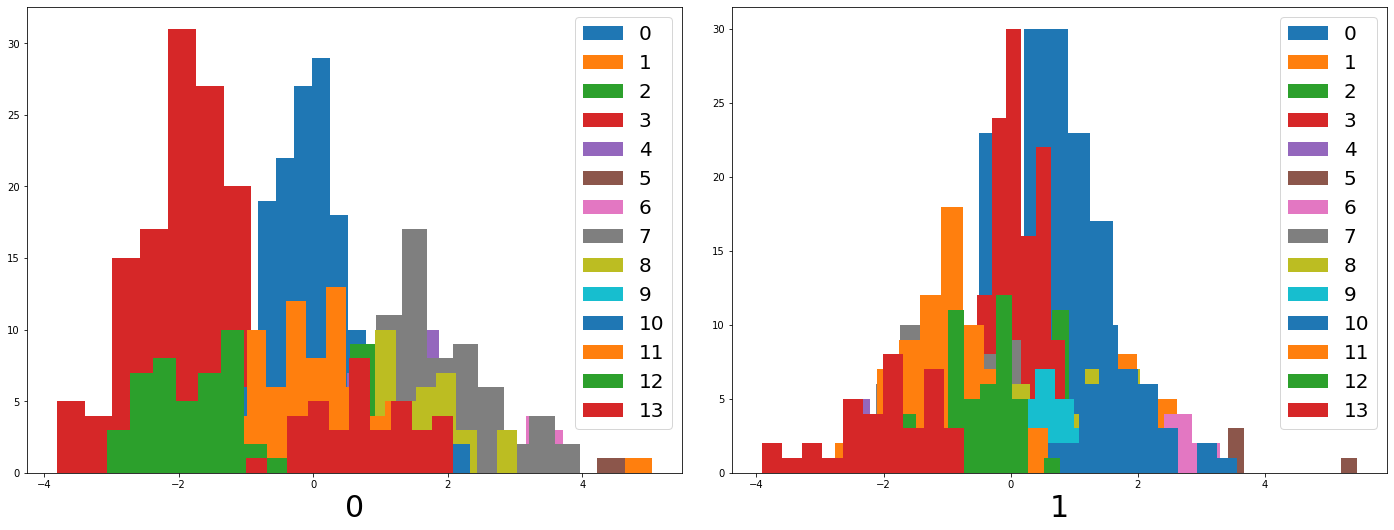

In [43]:
plt.figure(figsize=(20,8))
j = 1
for column in df.columns[0:-1]:
    plt.subplot(1,2,j)
    for i in range(0,14):
        plt.hist(df[df.cluster_labels == i][column], Label = i)
    plt.xlabel(column, fontsize = 30) 
    plt.legend(prop={'size': 20})
    j += 1
plt.tight_layout(pad=3.0)
plt.show()

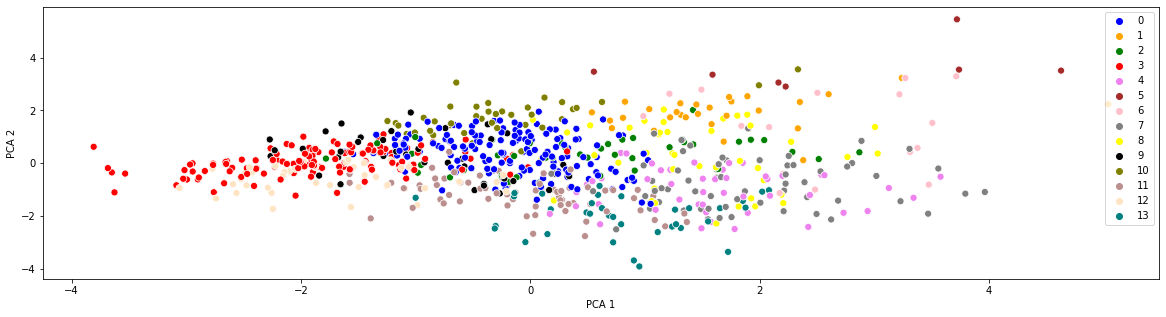

In [48]:
plt.figure(figsize=(20,5))
colors = cm.rainbow(np.linspace(0, 1, df['cluster_labels'].nunique()))

sns.scatterplot(PCA_components[0], PCA_components[1],
                palette = ['blue','orange', 'green', 'red', 'violet', 'brown','pink',
                           'grey', 'yellow', 'black', 'olive', 
                          'rosybrown', 'bisque', 'teal'] , s = 50 , hue = df['cluster_labels'].values)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

---
<a id='questions'></a>
# 3. Assignment questions (lab 6)

<div class="alert alert-block alert-danger">
<b>Question 6.1</b>: Apply k-means algorithms considering only <b>bmi</b> and <b>glucose</b> features from the original dataset:

- What are the selected number of clusters? Justify your answer

</div>

<div class="alert alert-block alert-danger">
<b>Question 6.2</b>: Apply k-means algorithms considering ALL features

- What are the selected number of clusters? Justify your answer
- Can you provide with any interpretation about cluster results? What salient feature/behavior characterize each cluster
</div>

<div class="alert alert-block alert-danger">
<b>Question 6.3</b>: Apply k-means algorithms considering Principal Component Analysis extracted features:

- What are the number of components you are using? Justify your answer
- What are the selected number of clusters? 
- Can you provide with any interpretation about cluster results? What salient feature/behavior characterize each cluster
</div>

<div class="alert alert-block alert-danger">
<b>Question 6.4</b>: Repeat from question 6.1 to 6.3 in the case of hierarchical clustering
</div>


